In [69]:
# !pip install missingno

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
data = pd.read_csv('./1/seattle-weather.csv')


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [20]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
data.shape


(1461, 6)

In [29]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="hls")

TypeError: countplot() got multiple values for argument 'data'

In [23]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


In [24]:
data[["precipitation","temp_max","temp_min","wind"]].describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

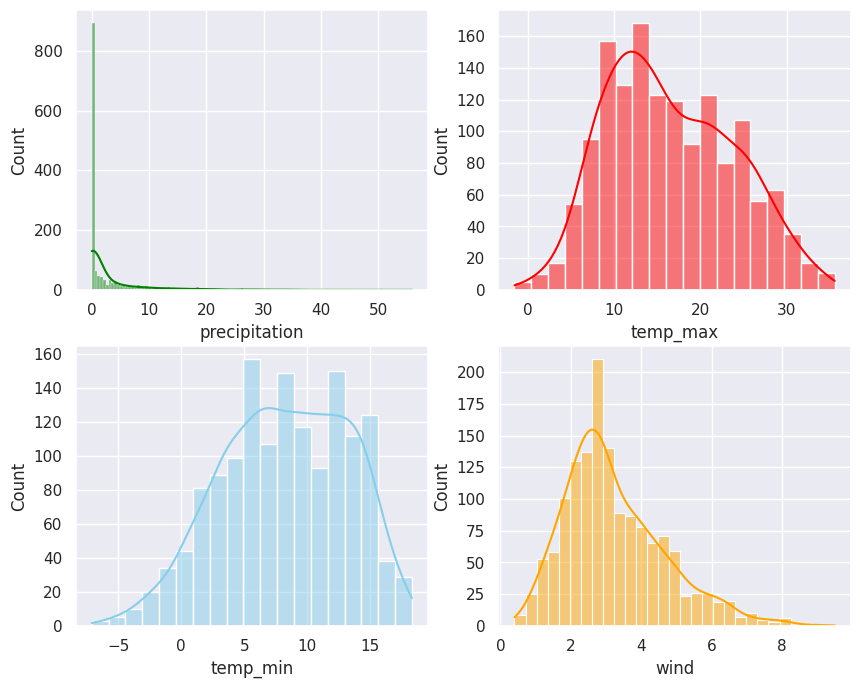

In [25]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

ValueError: Could not interpret value `humidity` for `x`. An entry with this name does not appear in `data`.

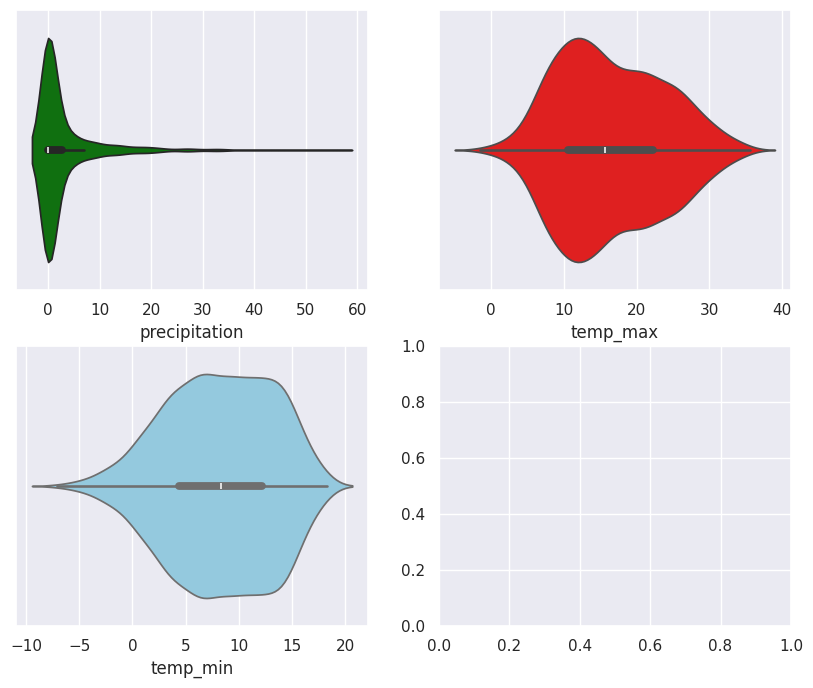

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# NOTE: removed kde=True
sns.violinplot(data=data, x="precipitation", ax=axs[0,0], color='green')
sns.violinplot(data=data, x="temp_max",      ax=axs[0,1], color='red')
sns.violinplot(data=data, x="temp_min",      ax=axs[1,0], color='skyblue')
sns.violinplot(data=data, x="humidity",      ax=axs[1,1], color='orange')

plt.tight_layout()
plt.show()

<Axes: xlabel='precipitation', ylabel='weather'>

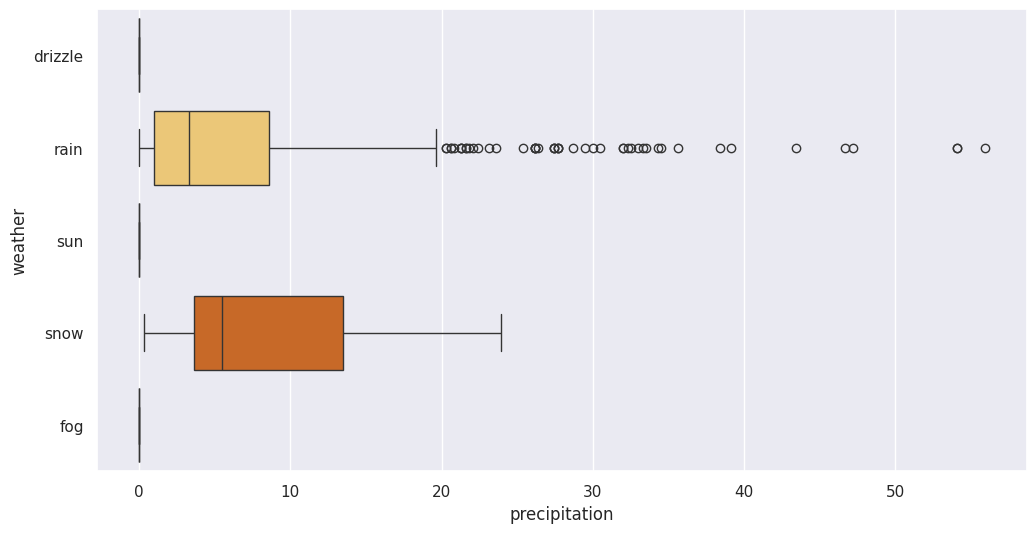

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x="precipitation", y="weather", data=data, palette="YlOrBr")


<Axes: xlabel='temp_max', ylabel='weather'>

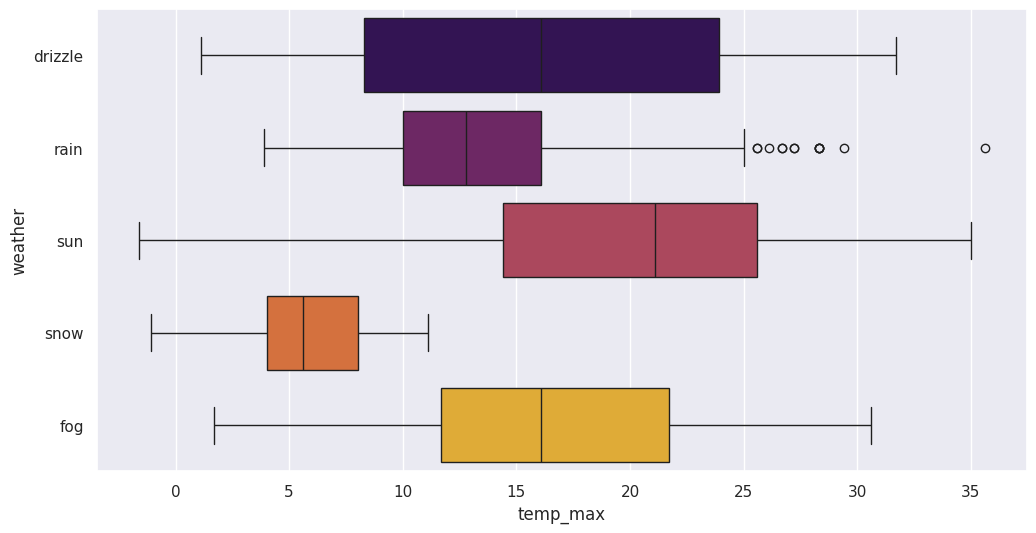

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data=data,palette="inferno")

<Axes: xlabel='wind', ylabel='weather'>

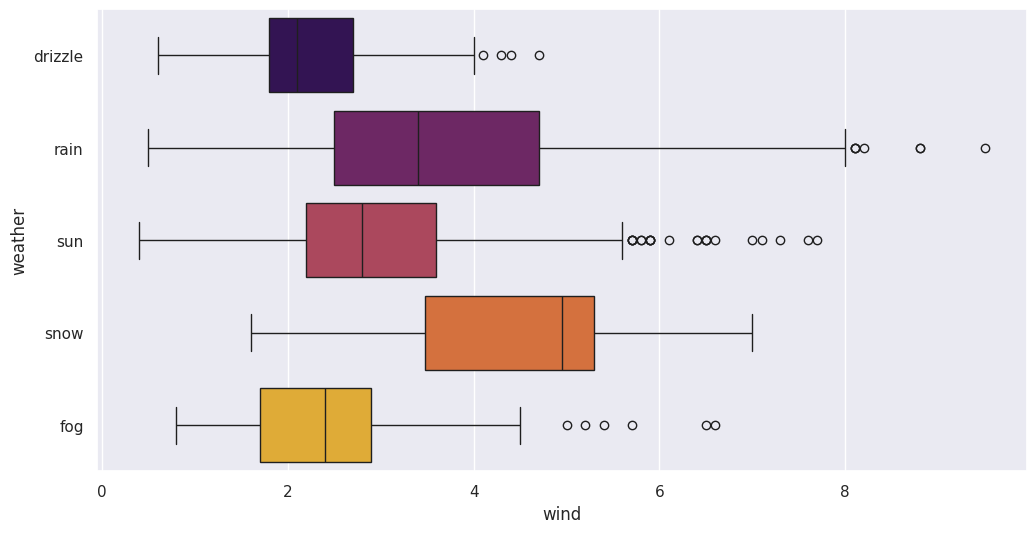

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x="wind",y="weather",data=data,palette="inferno")

<Axes: xlabel='temp_min', ylabel='weather'>

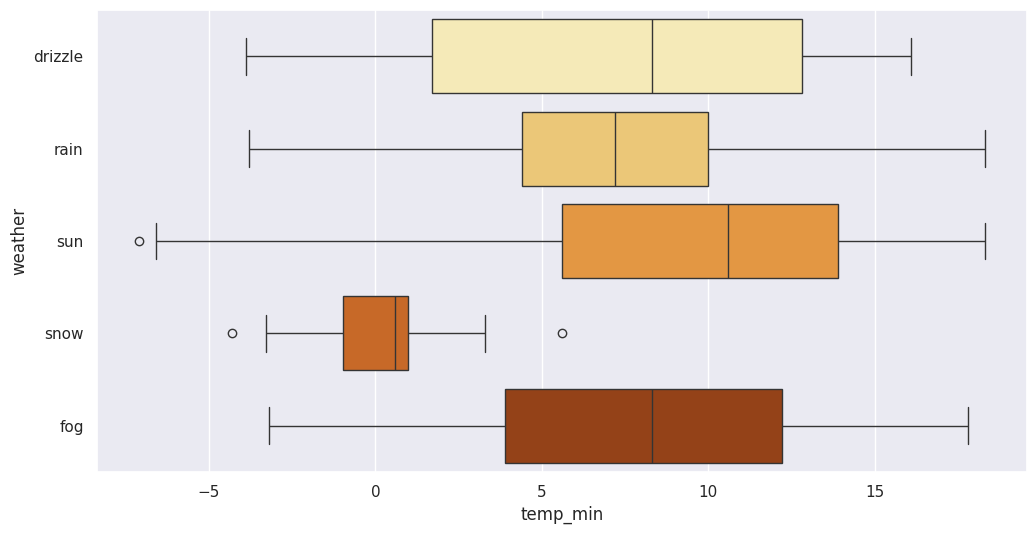

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_min",y="weather",data=data,palette="YlOrBr")

Pearson correlation: -0.16485663487495486
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


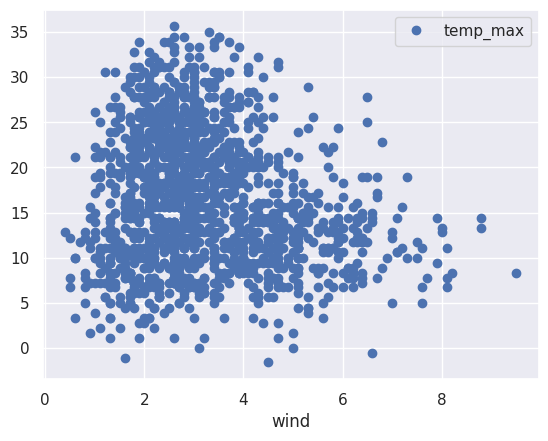

In [36]:
data.plot("wind","temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

<Axes: xlabel='temp_max'>

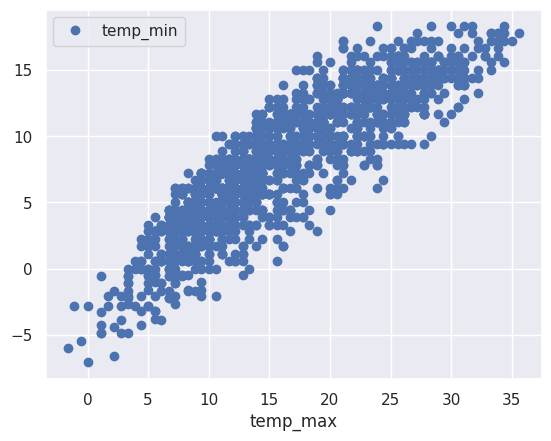

In [38]:
data.plot("temp_max","temp_min",style='o') 


In [39]:
data.isna().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

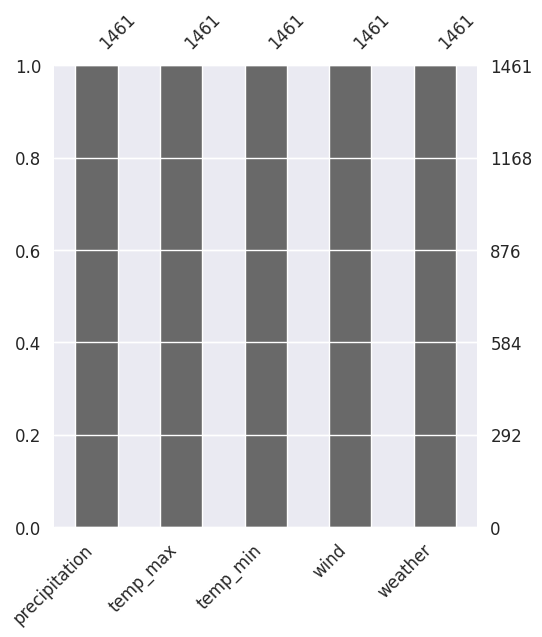

In [40]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=12);

In [41]:
df=data.drop(["date"],axis=1)


In [49]:
import numpy as np

# create a new DataFrame with only numeric dtypes
num_df = df.select_dtypes(include=[np.number])

Q1  = num_df.quantile(0.25)
Q3  = num_df.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

precipitation     0.00000
temp_max         10.60000
temp_min          4.40000
wind              1.48324
weather           2.00000
Name: 0.25, dtype: float64
precipitation     1.67332
temp_max         22.20000
temp_min         12.20000
wind              2.00000
weather           4.00000
Name: 0.75, dtype: float64
precipitation     1.67332
temp_max         11.60000
temp_min          7.80000
wind              0.51676
weather           2.00000
dtype: float64


In [50]:
# e.g. flag rows where ANY feature is outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
is_outlier = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)
clean_df   = df.loc[~is_outlier]

In [43]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<Axes: xlabel='wind', ylabel='Count'>

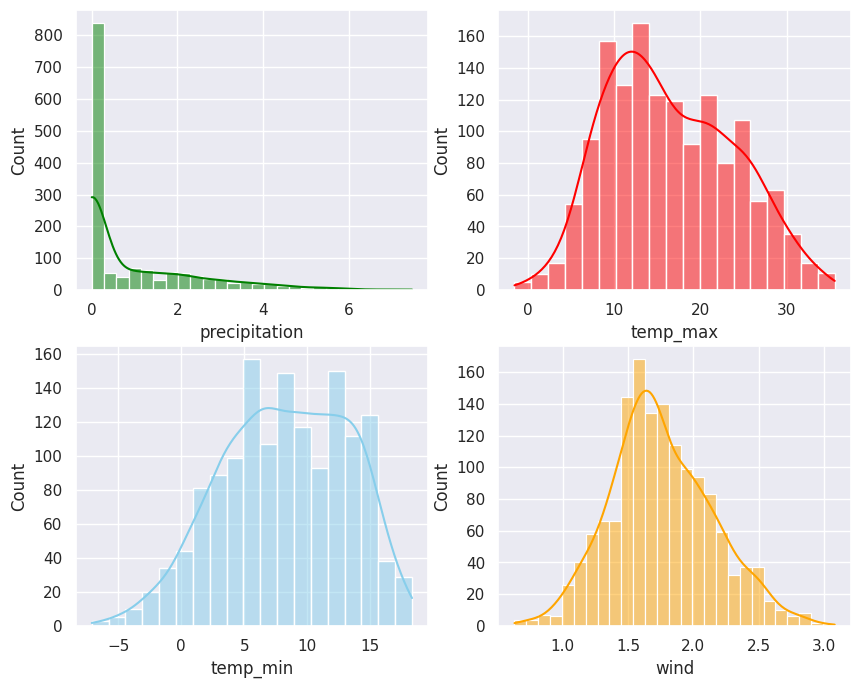

In [44]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [45]:
df.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
1,3.301515,10.6,2.8,2.121320,rain
2,0.894427,11.7,7.2,1.516575,rain
3,4.505552,12.2,5.6,2.167948,rain
4,1.140175,8.9,2.8,2.469818,rain


In [46]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [68]:
joblib.dump(lc, 'label_encoder.pkl')
print("LabelEncoder saved as 'label_encoder.pkl'.")

LabelEncoder saved as 'label_encoder.pkl'.


In [47]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [48]:
df.weather.unique()


array([0, 2, 4, 3, 1])

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)


In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:74.15%


In [53]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:79.59%


In [54]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:75.51%


In [55]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:80.27%


In [58]:
# —————————————————————————————————————————
# Cell — Save & Download your trained XGBoost
import joblib
from IPython.display import FileLink

# 1) Save the fitted model
joblib.dump(xgb, 'weather_xgb_model.joblib')
print("✅ Model saved to weather_xgb_model.joblib")

# 2) Show a clickable link to download it
display(FileLink('weather_xgb_model.joblib'))

✅ Model saved to weather_xgb_model.joblib


/workspace/saumilya/weather/weather_xgb_model.joblib

In [66]:
input=[[19.8,0,-2.8,1.6]]
ot=svm.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain


In [57]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [60]:
accuracy = svm.score(x_test, y_test) * 100
print("SVM Accuracy: {:.2f}%".format(accuracy))

# ✅ Save the model
joblib.dump(svm, 'svm_model.joblib')
print("SVM model saved as 'svm_model.joblib'")

SVM Accuracy: 79.59%
SVM model saved as 'svm_model.joblib'


In [70]:
import IPython
IPython.display.display(IPython.display.Javascript('IPython.notebook.save_checkpoint();'))


<IPython.core.display.Javascript object>